In [1]:
!unzip /content/new_violence.zip -d /content/dataset

Archive:  /content/new_violence.zip
   creating: /content/dataset/new_violence/non_violence/
  inflating: /content/dataset/new_violence/non_violence/0.jpg  
  inflating: /content/dataset/new_violence/non_violence/1.jpg  
  inflating: /content/dataset/new_violence/non_violence/10.jpg  
  inflating: /content/dataset/new_violence/non_violence/100.jpg  
  inflating: /content/dataset/new_violence/non_violence/1000.jpg  
  inflating: /content/dataset/new_violence/non_violence/1001.jpg  
  inflating: /content/dataset/new_violence/non_violence/1002.jpg  
  inflating: /content/dataset/new_violence/non_violence/1003.jpg  
  inflating: /content/dataset/new_violence/non_violence/1004.jpg  
  inflating: /content/dataset/new_violence/non_violence/1005.jpg  
  inflating: /content/dataset/new_violence/non_violence/1006.jpg  
  inflating: /content/dataset/new_violence/non_violence/1007.jpg  
  inflating: /content/dataset/new_violence/non_violence/1008.jpg  
  inflating: /content/dataset/new_violence/no

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=25

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/new_violence",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 4024 files belonging to 2 classes.


In [7]:
folder_names = dataset.class_names
print(folder_names)

['non_violence', 'violence']


In [8]:
print(type(dataset.take(0)))

<class 'tensorflow.python.data.ops.take_op._TakeDataset'>


In [9]:
for image in dataset.take(1):
    print(image)

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[164.0625  ,  83.75    ,  92.125   ],
         [159.875   ,  74.1875  ,  83.0625  ],
         [152.13672 ,  58.98828 ,  66.5     ],
         ...,
         [ 79.60156 ,  51.976562,  74.10156 ],
         [ 75.0625  ,  62.398438,  80.41797 ],
         [ 86.44531 ,  81.3125  ,  98.72266 ]],

        [[160.85547 ,  80.54297 ,  88.91797 ],
         [155.55469 ,  72.50391 ,  80.5     ],
         [151.33984 ,  58.964844,  66.08984 ],
         ...,
         [ 82.77734 ,  55.152344,  78.625   ],
         [ 75.19531 ,  62.445312,  82.265625],
         [ 83.875   ,  76.37891 ,  94.64844 ]],

        [[156.6875  ,  78.51172 ,  86.1875  ],
         [153.02734 ,  71.40234 ,  78.75    ],
         [148.5586  ,  57.691406,  64.81641 ],
         ...,
         [ 90.50391 ,  60.878906,  85.44141 ],
         [ 82.52734 ,  66.0625  ,  87.63281 ],
         [ 86.10156 ,  76.41406 ,  96.72656 ]],

        ...,

        [[131.6875  ,  90.6875  

In [10]:
for image in dataset.take(1):
    print(image[0].shape)

(32, 256, 256, 3)


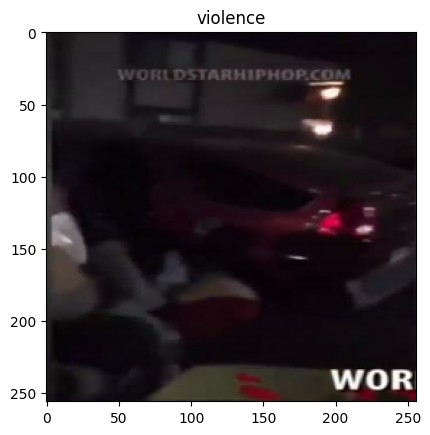

In [11]:
for image_batch, label_batch in dataset.take(1):

    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(folder_names[label_batch[0]])

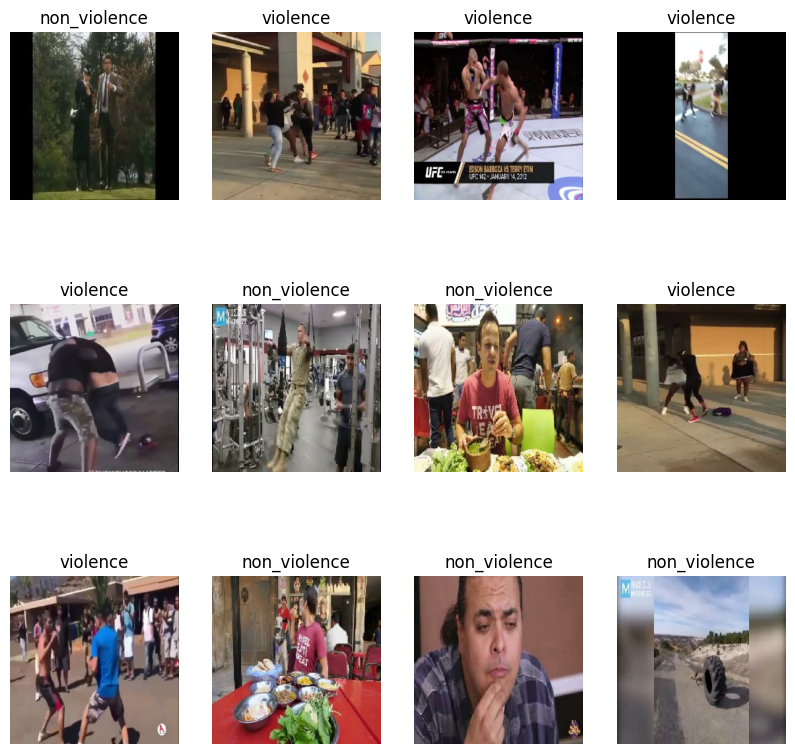

In [12]:
plt.figure(figsize = (10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(folder_names[label_batch[i]])
        plt.axis("off")

In [13]:
len(dataset)

126

In [14]:
train_dataset = dataset.take(250)
len(train_dataset)

126

In [15]:
test_dataset = dataset.skip(250)
len(test_dataset)

0

In [16]:
val_size=0.1
len(dataset)*val_size

12.600000000000001

In [19]:
val_dataset = test_dataset.take(34)
len(val_dataset)

0

In [22]:
test_dataset = test_dataset.skip(34)
len(test_dataset)

0

In [23]:
def partition_dataset(dataset, train_size = 0.8, test_size = 0.1, valid_size = 0.1, shuffle = True, shuffle_size = 10000):

    assert (train_size + test_size + valid_size) == 1

    size_dataset = len(dataset)

    if shuffle == True:
        dataset.shuffle(shuffle_size, seed = 5)

    train_data_size = int(size_dataset * train_size)
    valid_data_size = int(size_dataset * valid_size)
    test_data_size = int(size_dataset * test_size)

    train_dataset = dataset.take(train_data_size)
    valid_dataset = dataset.skip(train_data_size).take(valid_data_size)
    test_dataset = dataset.skip(train_data_size).skip(valid_data_size).take(test_data_size)

    return train_dataset, valid_dataset, test_dataset


In [24]:
train_dataset, valid_dataset, test_dataset = partition_dataset(dataset)

In [25]:
len(train_dataset)

100

In [26]:
len(test_dataset), len(valid_dataset)

(12, 12)

In [27]:

train_dataset = train_dataset.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

valid_dataset = valid_dataset.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

test_dataset = test_dataset.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [28]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255),
])

In [31]:
preprocessing = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255)
])

In [32]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [34]:
train_dataset = train_dataset.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)



In [37]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

In [38]:
model = models.Sequential()

pre_trained_model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=input_shape,
    pooling='avg',
    classes=2,  
    classifier_activation="softmax",
)

for layer in pre_trained_model.layers:
    layer.trainable = False

model.add(pre_trained_model)
model.add(layers.Flatten())

dummy_input = np.ones((1,) + input_shape)
_ = model.predict(dummy_input)

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

1/1 [==============================] - 2s 2s/step


In [39]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 1280)              4049571   
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 4705956 (17.95 MB)
Trainable params: 656385 (2.50 MB)
Non-trainable params: 4049571 (15.45 MB)
_________________________________________________________________


In [40]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [42]:
history = model.fit(
    train_dataset,
    batch_size=BATCH_SIZE,
    validation_data=valid_dataset,
    verbose=1,
    epochs=5,
)

Epoch 1/5
100/100 [==============================] - 444s 4s/step - loss: 0.2183 - accuracy: 0.9066 - val_loss: 0.0909 - val_accuracy: 0.9714
Epoch 2/5
100/100 [==============================] - 386s 4s/step - loss: 0.1154 - accuracy: 0.9547 - val_loss: 0.0697 - val_accuracy: 0.9688
Epoch 3/5
100/100 [==============================] - 376s 4s/step - loss: 0.0958 - accuracy: 0.9666 - val_loss: 0.0685 - val_accuracy: 0.9740
Epoch 4/5
100/100 [==============================] - 377s 4s/step - loss: 0.0799 - accuracy: 0.9672 - val_loss: 0.0472 - val_accuracy: 0.9818
Epoch 5/5
100/100 [==============================] - 369s 4s/step - loss: 0.0655 - accuracy: 0.9750 - val_loss: 0.0473 - val_accuracy: 0.9792


In [43]:
scores = model.evaluate(test_dataset)

12/12 [==============================] - 42s 3s/step - loss: 0.0333 - accuracy: 0.9896


In [46]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_probability = predictions[0][0]  

    if predicted_probability >= 0.5:
        predicted_class = 1
    else:
        predicted_class = 0

    confidence = round(100 * predicted_probability, 2)

    return predicted_class, confidence

1/1 [==============================] - 0s 101ms/step


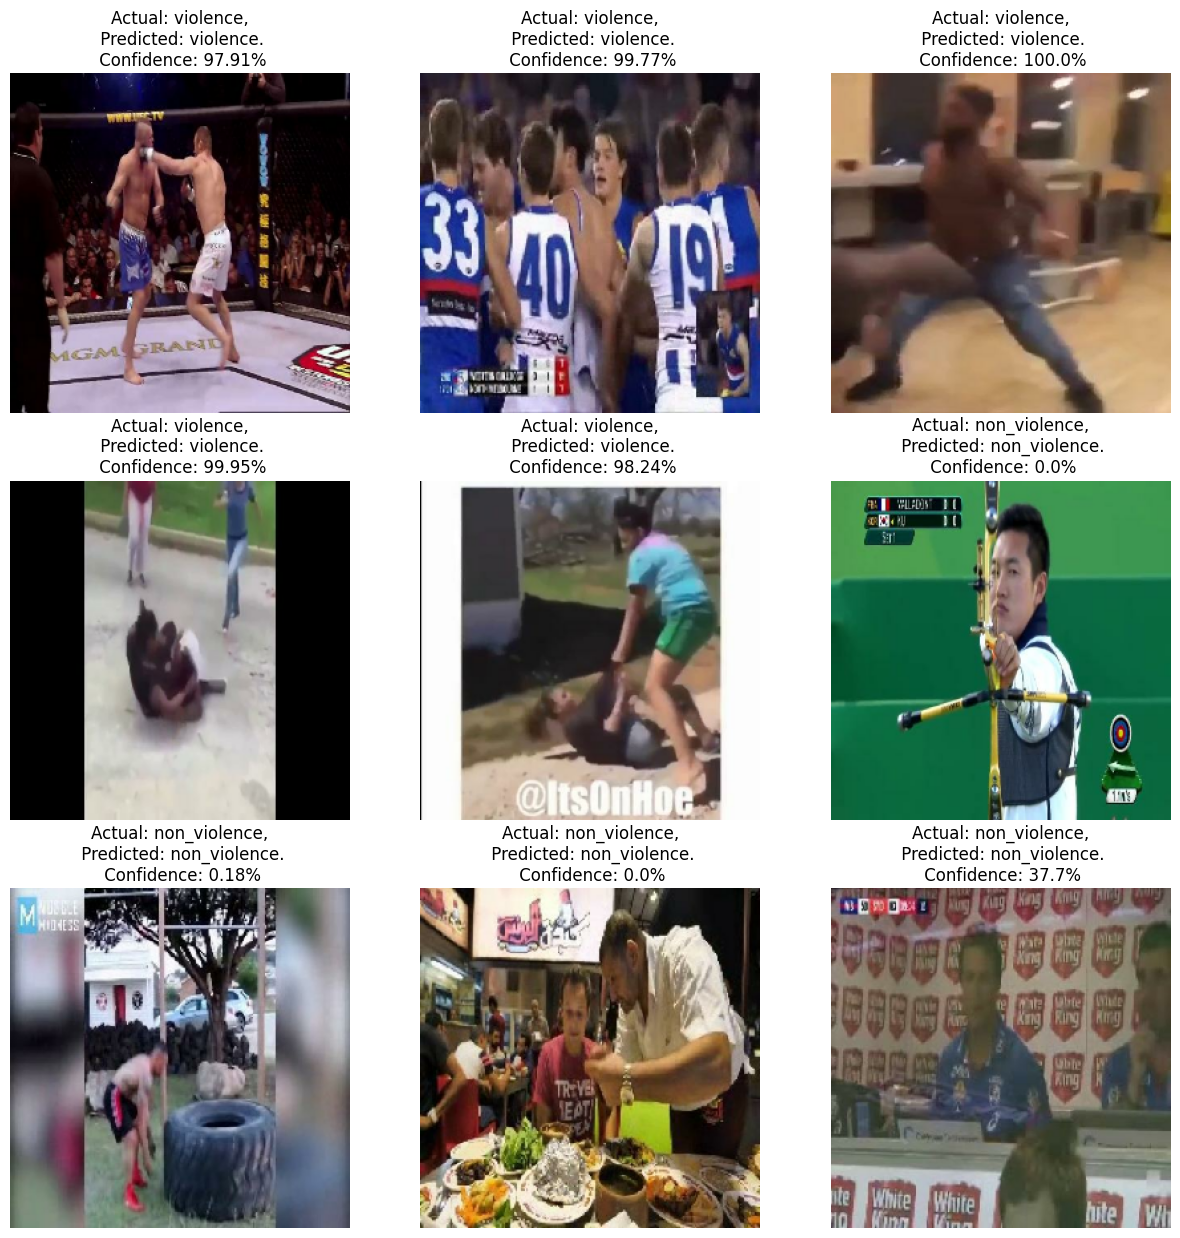

In [48]:
plt.figure(figsize=(15, 15))
for images, labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        predicted_class = folder_names[predicted_class]
        actual_class = folder_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [50]:
history


In [51]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 100}

In [52]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

loss = history.history['loss']
validation_loss = history.history['val_loss']


Text(0.5, 1.0, 'Training and Validation Accuracy')

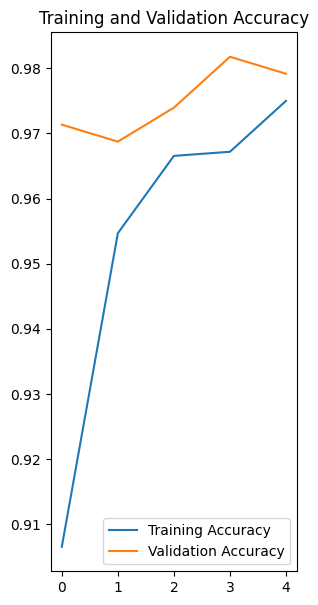

In [53]:
plt.figure(figsize=(7, 7))
plt.subplot(1, 2, 2)
plt.plot(range(5), accuracy, label = 'Training Accuracy')
plt.plot(range(5), validation_accuracy, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation Loss')

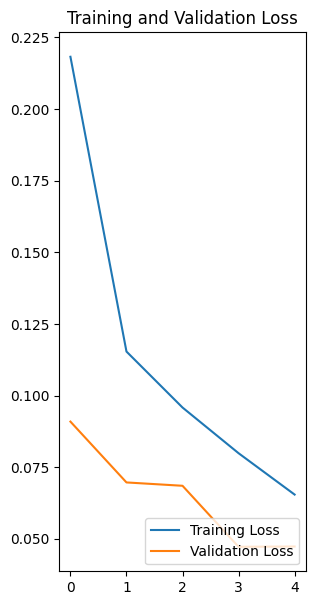

In [54]:
plt.figure(figsize=(7, 7))
plt.subplot(1, 2, 2)
plt.plot(range(5), loss, label = 'Training Loss')
plt.plot(range(5), validation_loss, label = 'Validation Loss')
plt.legend(loc = 'lower right')
plt.title("Training and Validation Loss")

First Image to predict
First Image's Actual label:  violence
1/1 [==============================] - 3s 3s/step
The model prediction is:  non_violence


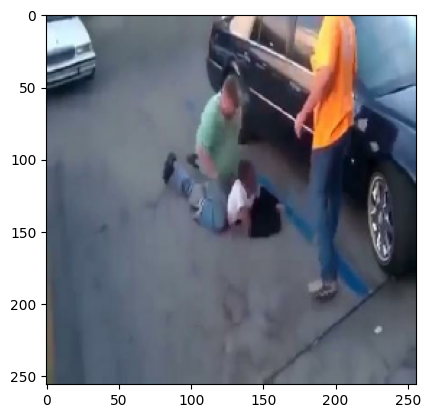

In [55]:
for images_batch, labels_batch in test_dataset.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0]

    print("First Image to predict")
    plt.imshow(first_image)
    print("First Image's Actual label: ", folder_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("The model prediction is: ", folder_names[np.argmax(batch_prediction[0])])

In [56]:
model.save('/content/trained_model')

In [57]:
import zipfile
import os

folder_path = '/content/trained_model'  

zip_file_path = '/content/trained_model.zip'  

with zipfile.ZipFile(zip_file_path, 'w') as zip_ref:
    for foldername, subfolders, filenames in os.walk(folder_path):
        for filename in filenames:
            file_path = os.path.join(foldername, filename)
            zip_ref.write(file_path, os.path.relpath(file_path, folder_path))

print(f"Folder '{folder_path}' has been zipped to '{zip_file_path}'.")


Folder '/content/trained_model' has been zipped to '/content/trained_model.zip'.
